#### 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수를 예측하기
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간
- 타겟 : 점수
- 학습방법 : 지도학습 -> 회귀
- 알고리즘 : 선형회귀 -> 조건 데이터분포가 선형일 때 가능

#### 1. 데이터 준비

In [34]:
jumsu =range(7,100, 7)
len(jumsu), jumsu[-1]

hour=range(1,29,2)
len(hour)

14

In [35]:
# list -> DataFrame으로 변환
import pandas as pd
hourdf=pd.DataFrame(hour, columns=['Hour'])
hourdf

jumsusr=pd.Series(jumsu)
jumsusr

0      7
1     14
2     21
3     28
4     35
5     42
6     49
7     56
8     63
9     70
10    77
11    84
12    91
13    98
dtype: int64

In [36]:
import matplotlib.pyplot as plt

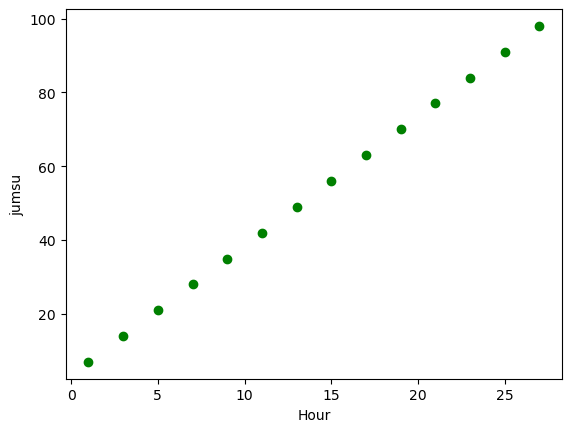

In [37]:
plt.plot(hourdf, jumsusr, 'go')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.show()

#### 모델 생성 및 학습 진행

In [38]:
# 모듈로딩
from sklearn.linear_model import LinearRegression

In [39]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [40]:
# 학습 진행 -> 최대한 많은 데이터를 만족하는 기울기와 절편 찾기
model.fit(hourdf, jumsusr)

LinearRegression()

In [41]:
# 학습 후 모델 파라미터
print(f'기울기:{model.coef_}, 절편: {model.intercept_}')

기울기:[3.5], 절편: 3.500000000000014


In [42]:
# y = ax + b
# a = 3.5
# b = 3.5000000004
pre_jumsu = model.coef_[0]*hourdf+model.intercept_
pre_jumsu=pre_jumsu.values.reshape(-1) # reshape 1차원 한단계 낮춤

In [43]:
# 실제 점수 와 예측 점수 차이 확인
real_jumsu = jumsusr.to_numpy()
real_jumsu - pre_jumsu

array([-1.33226763e-14, -1.06581410e-14, -1.06581410e-14, -7.10542736e-15,
       -7.10542736e-15, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  1.42108547e-14])

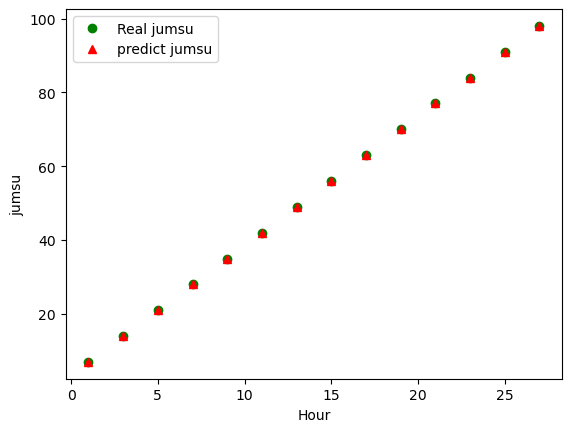

In [44]:
plt.plot(hourdf, jumsusr, 'go', label='Real jumsu')
plt.plot(hourdf, pre_jumsu, 'r^', label='predict jumsu')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.legend()
plt.show()

#### 3. 모델 성능 평가

In [45]:
model.score(hourdf, jumsusr)

1.0

In [46]:
# 오차 계산 즉, 손실/비용 함수 확인
# ver 1.4 이상 root_mean_squared_error 사용 가능
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 회귀 모델의 성능을 평가하는 지표

In [48]:
pre_y = model.predict(hourdf)


In [55]:
mse = mean_squared_error(jumsusr, pre_y)
rmse = mean_squared_error(jumsusr, pre_y, squared=False)
mae = mean_absolute_error(jumsusr, pre_y)
r2 = r2_score(jumsusr, pre_y)

In [56]:

print(mse)
# 평균 제곱 오차는 예측 값과 실제 값 간의 차이를 제곱하여 평균을 구한 값
# # 값이 작을 수록 모델의 성능이 좋음을 나타냄
print(rmse)


print(mae)
# 평균 절대 오차는 예측 값과 실제 값 간의 차이의 절대값을 평균한 값
# 값이 작을 수록 모델의 성능이 좋음을 나타냄

print(r2)
# 결정 계수 : 모델이 데이터의 변동성을 얼마나 설명하는지 지표임.
# 1에 가까울 수록 모델이 데이터를 잘 설명함
# 회귀 모델을 평가할 때 사용

6.857455154671224e-29
8.280975277508818e-15
6.026924990822278e-15
1.0


In [ ]:
# 규칙 / 패턴 -> 공부시간과 과외횟수에 점수결정
# 공부시간과 과외시간이 얼마나 점수에 영향을 미치는지
# 피쳐가 2개 들어감 
# 점수 = (공부시간 * 기울기값[가중치]) + (과외횟수* 기울기값[가중치]) + 절편
# y = ax + bx + c 를 구하면 점수를 예측할 수 있다.
# 피쳐가 늘어갈 수록 각각의 피쳐들이 정수에 영향을 미치는지는 달라짐
# 피쳐가 늘어가는걸 다변량 -> 피쳐가 많은걸 다중선형회귀라고함.


